# <h1> Activities</h1>
<ol type='1'>
<li><h2><a href="#preparation">Data Preparation</a></h2></li>
<li><h2><a href="#impact">Impact Analysis</a></h2></li>

<li><h2><a href="#trend">Trend Analysis</a></h2></li>

<li><h2><a href="#correlation">Correlation Analysis</a></h2></li>


In [ ]:
#!pip install cufflinks

In [ ]:
import pandas as pd
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.graph_objects as px
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import seaborn as sns


import warnings
warnings.filterwarnings ("ignore")

In [ ]:
covid_mobility_df = pd.read_csv("rw-mobility-covid-data.csv")

In [ ]:
covid_mobility_df

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
0,2020-02-15,8.0,5.0,7.0,12.0,5.0,-2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-16,1.0,-1.0,-2.0,5.0,6.0,-1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-17,1.0,0.0,8.0,5.0,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-18,0.0,-2.0,9.0,0.0,4.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-19,-4.0,-8.0,7.0,1.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,2022-02-27,50.0,28.0,111.0,26.0,23.0,16.0,129489.0,4.0,16.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
744,2022-02-28,53.0,23.0,135.0,22.0,26.0,16.0,129502.0,13.0,17.714,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
745,2022-03-01,56.0,21.0,136.0,15.0,25.0,15.0,129516.0,14.0,13.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543
746,2022-03-02,49.0,15.0,131.0,14.0,24.0,17.0,129533.0,17.0,13.857,...,1.642,1854.211,56.0,191.375,4.28,4.7,21.0,4.617,69.02,0.543


In [ ]:
covid_mobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 57 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                748 non-null    object 
 1   retail_and_recreation_percent_change_from_baseline  748 non-null    float64
 2   grocery_and_pharmacy_percent_change_from_baseline   748 non-null    float64
 3   parks_percent_change_from_baseline                  748 non-null    float64
 4   transit_stations_percent_change_from_baseline       748 non-null    float64
 5   workplaces_percent_change_from_baseline             748 non-null    float64
 6   residential_percent_change_from_baseline            748 non-null    float64
 7   total_cases                                         720 non-null    float64
 8   new_cases                                           720 non-null    float64
 9  

In [ ]:
covid_mobility_df.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,total_cases,new_cases,new_cases_smoothed,total_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,720.00000,720.000000,714.000000,643.000000,...,7.200000e+02,7.200000e+02,720.0,720.000,7.200000e+02,7.200000e+02,720.0,7.200000e+02,7.200000e+02,7.200000e+02
mean,2.366310,-10.311497,13.312834,-16.455882,-14.012032,14.926471,40023.73750,179.920833,181.376744,548.636081,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
std,31.076527,20.843730,24.857904,24.408053,20.079657,8.498756,44516.22289,314.119722,285.450621,552.305359,...,2.844147e-14,1.592722e-11,0.0,0.000,5.155016e-14,5.243896e-14,0.0,5.599414e-14,8.390233e-13,5.221676e-15
min,-71.000000,-76.000000,-32.000000,-80.000000,-76.000000,-3.000000,1.00000,0.000000,1.143000,1.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
25%,-15.000000,-20.000000,-4.000000,-29.000000,-24.000000,10.000000,4474.25000,15.000000,17.714000,36.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
50%,2.000000,-9.000000,7.000000,-13.000000,-13.000000,13.000000,19719.00000,55.000000,60.642500,322.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
75%,28.000000,5.250000,30.250000,3.000000,1.000000,17.000000,89585.00000,166.250000,160.642750,1237.500000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01
max,68.000000,33.000000,167.000000,28.000000,30.000000,47.000000,129543.00000,3072.000000,1396.571000,1458.000000,...,1.642000e+00,1.854211e+03,56.0,191.375,4.280000e+00,4.700000e+00,21.0,4.617000e+00,6.902000e+01,5.430000e-01


In [ ]:
#covid_mobility_df= pd.to_datetime(covid_mobility_df['date'])
#covid_mobility_df_new.dtypes
covid_mobility_df.set_index('date', inplace =True)

In [ ]:
covid_mobility_df.isnull().sum()

retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
total_cases                                            28
new_cases                                              28
new_cases_smoothed                                     34
total_deaths                                          105
new_deaths                                            105
new_deaths_smoothed                                   111
total_cases_per_million                                28
new_cases_per_million                                  28
new_cases_smoothed_per_million                         34
total_deaths_per_million                              105
new_deaths_per_million                                105
new_deaths_smo

In [ ]:
#missing values handling
covid_mobility_df.drop(columns=['total_vaccinations','people_vaccinated','people_fully_vaccinated','total_boosters','new_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','total_boosters_per_hundred'], axis = 1, inplace = True)

In [ ]:
covid_mobility_df.isnull().sum()

retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
total_cases                                            28
new_cases                                              28
new_cases_smoothed                                     34
total_deaths                                          105
new_deaths                                            105
new_deaths_smoothed                                   111
total_cases_per_million                                28
new_cases_per_million                                  28
new_cases_smoothed_per_million                         34
total_deaths_per_million                              105
new_deaths_per_million                                105
new_deaths_smo

In [ ]:
#Rename columns
name_mapping={'retail_and_recreation_percent_change_from_baseline':'rr',\
              'grocery_and_pharmacy_percent_change_from_baseline' :'gp',\
              'parks_percent_change_from_baseline' :'pks',\
              'transit_stations_percent_change_from_baseline':'transit',\
              'workplaces_percent_change_from_baseline':'wp',
              'residential_percent_change_from_baseline':'res'}
covid_mobility_df_new=covid_mobility_df.copy()

covid_mobility_df_new.rename(name_mapping, axis=1, inplace=True)
covid_mobility_df_new.head()

,rr,gp,pks,transit,wp,res,total_cases,new_cases,new_cases_smoothed,total_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-15,8.0,5.0,7.0,12.0,5.0,-2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-16,1.0,-1.0,-2.0,5.0,6.0,-1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,1.0,0.0,8.0,5.0,7.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18,0.0,-2.0,9.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19,-4.0,-8.0,7.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid_mobility_df_new.to_csv('clean_data.csv')

# Impact Analysis

In [ ]:
places_df = covid_mobility_df_new[['rr','gp','pks','wp','transit','res']]

df_gov_measures = covid_mobility_df_new[['stringency_index','new_cases','new_deaths']]



In [ ]:
places_gov_measures = places_df.join(df_gov_measures)

In [ ]:
places_gov_measures

,rr,gp,pks,wp,transit,res,stringency_index,new_cases,new_deaths
date,,,,,,,,,
2020-02-15,8.0,5.0,7.0,5.0,12.0,-2.0,NaN,NaN,NaN
2020-02-16,1.0,-1.0,-2.0,6.0,5.0,-1.0,NaN,NaN,NaN
2020-02-17,1.0,0.0,8.0,7.0,5.0,0.0,NaN,NaN,NaN
2020-02-18,0.0,-2.0,9.0,4.0,0.0,0.0,NaN,NaN,NaN
2020-02-19,-4.0,-8.0,7.0,2.0,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-02-27,50.0,28.0,111.0,23.0,26.0,16.0,45.37,4.0,0.0
2022-02-28,53.0,23.0,135.0,26.0,22.0,16.0,45.37,13.0,0.0
2022-03-01,56.0,21.0,136.0,25.0,15.0,15.0,NaN,14.0,0.0


In [ ]:
from matplotlib.pyplot import figure






In [ ]:
# creating a function that will return scatter plot for each place and each government action and covid data
def plot_scatter(data1,data2):
    for place in data1.columns:
        for j in data2.columns:
            figure(figsize=[10,6])
            plt.scatter(data2[j], data1[place], label=j+' vs '+place)
            plt.title(f'Scatter plot for {place}')
            plt.ylabel(place)
            plt.xlabel(j)
            plt.legend()
            plt.show()

In [ ]:
print(places_df.shape)
print(df_gov_measures.shape)

(748, 6)
(748, 3)


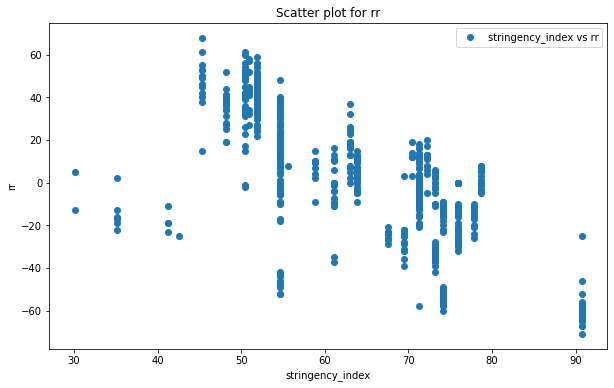

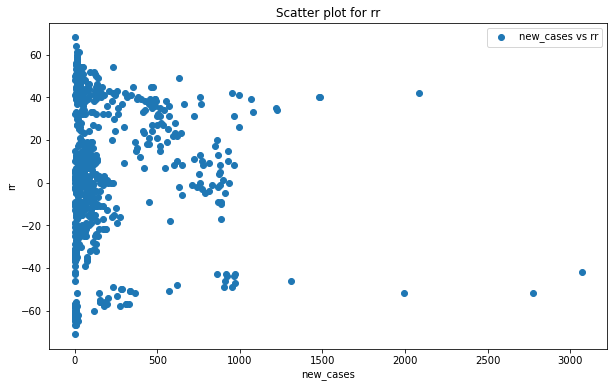

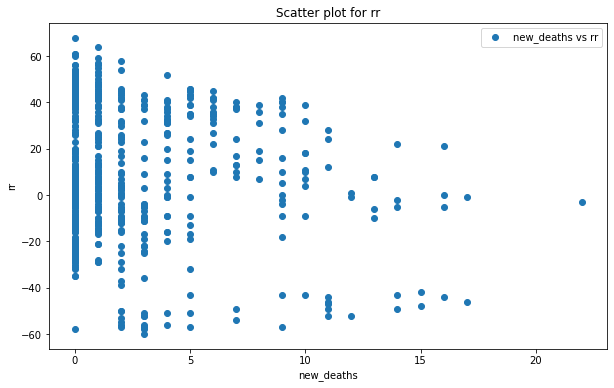

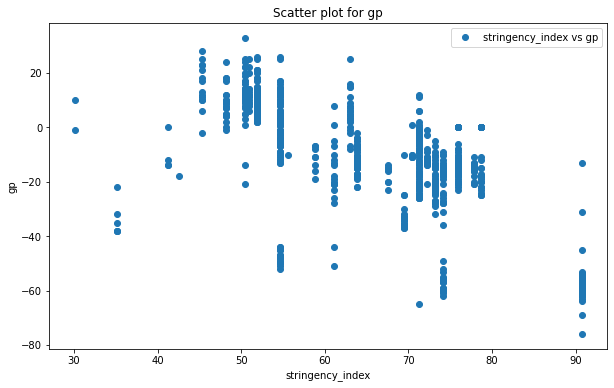

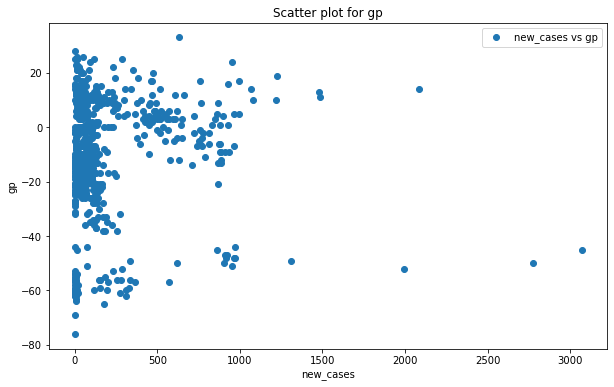

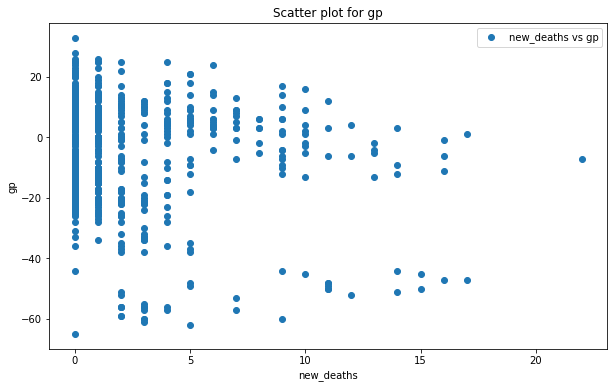

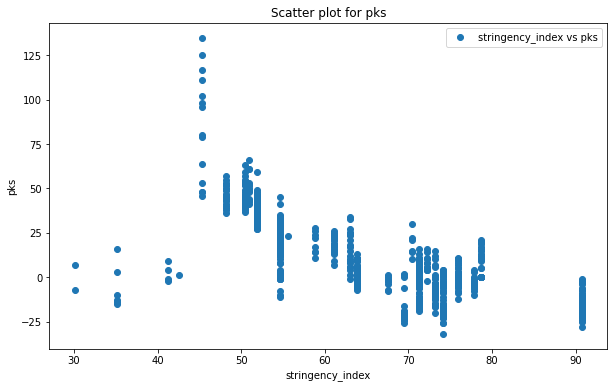

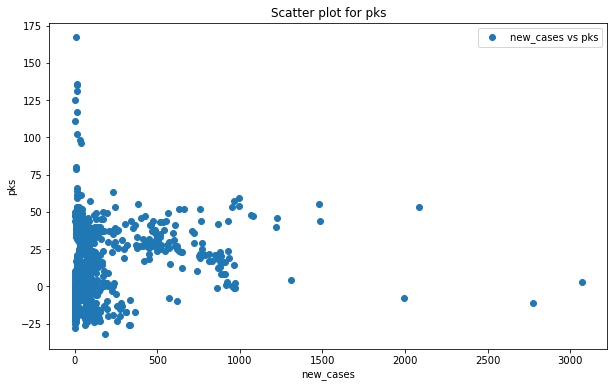

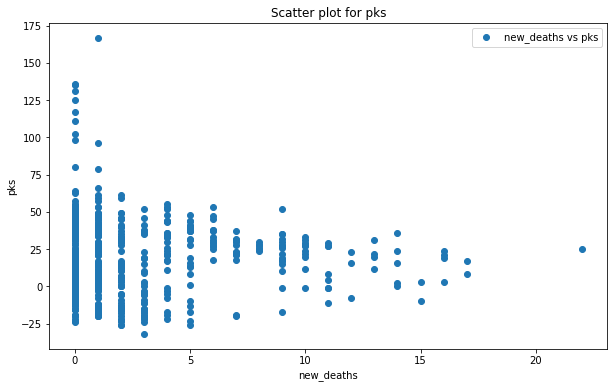

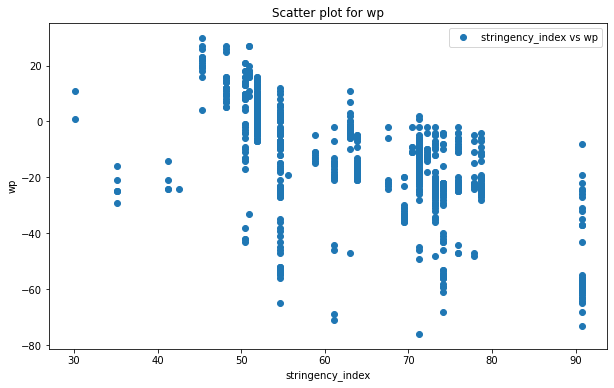

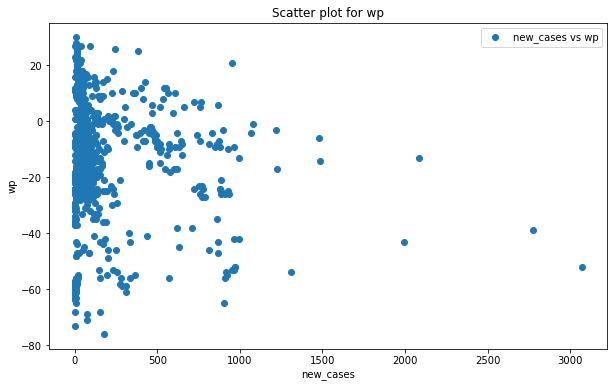

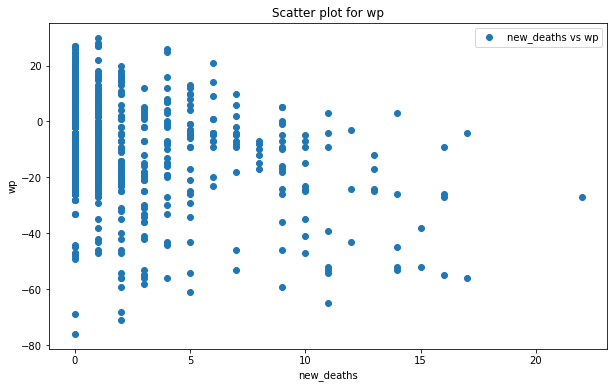

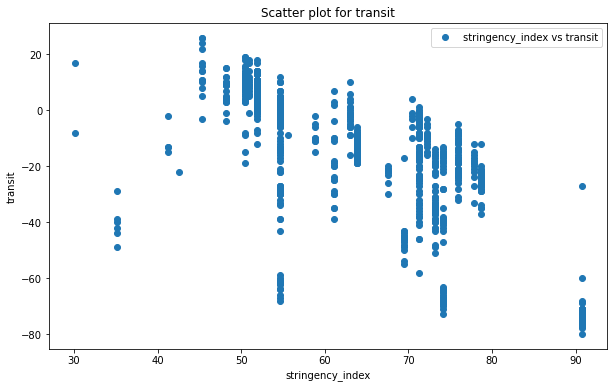

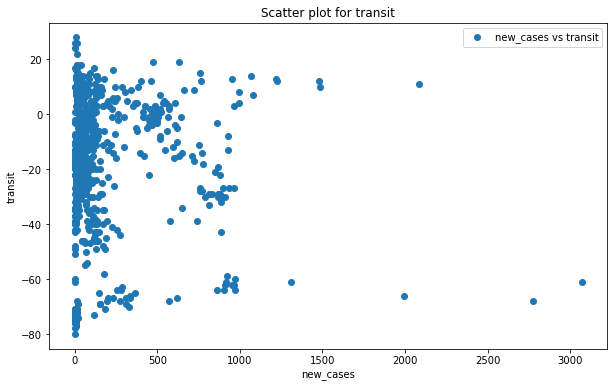

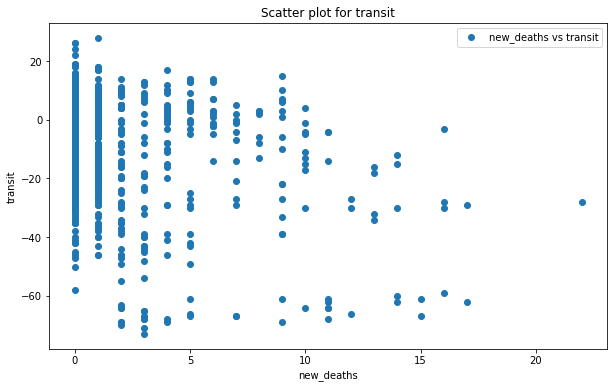

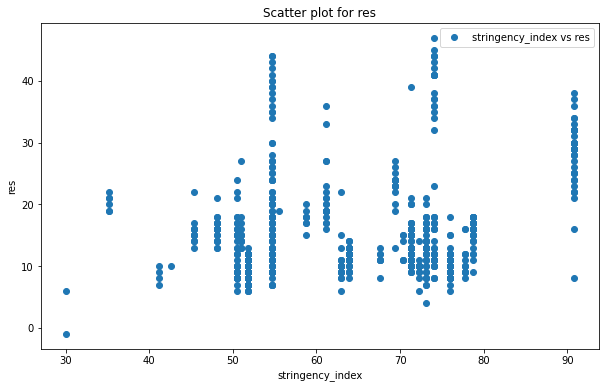

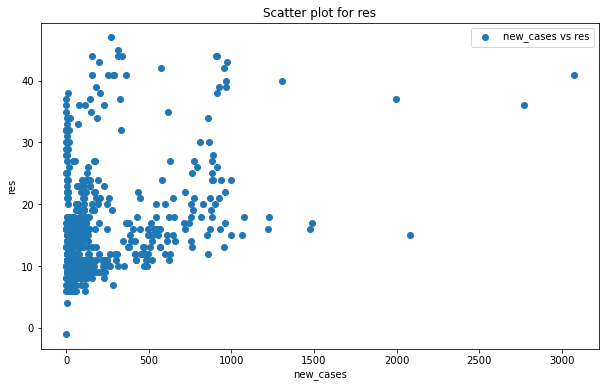

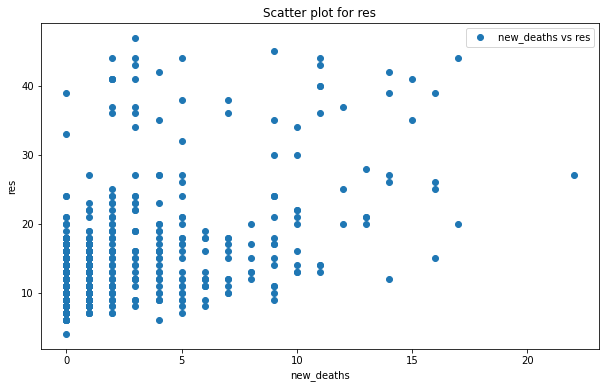

In [ ]:
# Recalling the function and passing places and covid dataframes
plot_scatter(places_df,df_gov_measures)

# TASK 3 : TRENDS

In [ ]:
# The user will be able to select place and period they want to visualize the trends in mobility data
# plot interactive graph of mobility data (places)
fig = px.line(places_df.reset_index('date'), x='date', y=places_df.columns,
              title='Mobility time series for different periods')

# Update the figure by seeting the x-axis period that the user may want to choose
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=12, label="12m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
for place in df_gov_measures.columns:
    places_gov_measures[['rr','gp','pks','wp','transit','res',place]].iplot(
        y = ['rr','gp','pks','wp','transit','res', place ],
        mode = 'lines',
        opacity=0.8,
        size=8,
        symbol=0,
        xTitle = 'Date',
        yTitle = 'selected place',
        title = 'Mobility trends and disease burden over time')

# TASK 4 : Correlation

In [ ]:
places_df1 = covid_mobility_df_new[['rr','gp','pks','wp','transit','res']]

df_gov_measures1 = covid_mobility_df_new[['stringency_index','new_cases','new_deaths','total_deaths','new_tests']]

places_gov_measures1 = pd.concat([places_df1,df_gov_measures1],axis=1)

In [ ]:
#Correlation Analysis
correlation_df = places_gov_measures1.corr()
correlation_df

,rr,gp,pks,wp,transit,res,stringency_index,new_cases,new_deaths,total_deaths,new_tests
rr,1.000000,0.931299,0.831877,0.845833,0.918315,-0.589122,-0.737626,0.044418,-0.119492,0.737779,0.625381
gp,0.931299,1.000000,0.754286,0.866176,0.945419,-0.714189,-0.676291,0.042380,-0.127904,0.613954,0.583982
pks,0.831877,0.754286,1.000000,0.689871,0.732663,-0.266784,-0.747399,0.158432,0.034147,0.790096,0.688202
wp,0.845833,0.866176,0.689871,1.000000,0.841840,-0.730387,-0.626975,-0.101184,-0.222492,0.606727,0.524029
transit,0.918315,0.945419,0.732663,0.841840,1.000000,-0.754407,-0.667065,-0.040014,-0.252741,0.588720,0.559802
res,-0.589122,-0.714189,-0.266784,-0.730387,-0.754407,1.000000,0.243428,0.355002,0.484443,-0.092587,-0.081202
stringency_index,-0.737626,-0.676291,-0.747399,-0.626975,-0.667065,0.243428,1.000000,-0.365769,-0.336609,-0.819493,-0.675456
new_cases,0.044418,0.042380,0.158432,-0.101184,-0.040014,0.355002,-0.365769,1.000000,0.652706,0.261620,0.470568
new_deaths,-0.119492,-0.127904,0.034147,-0.222492,-0.252741,0.484443,-0.336609,0.652706,1.000000,0.216138,0.220080
total_deaths,0.737779,0.613954,0.790096,0.606727,0.588720,-0.092587,-0.819493,0.261620,0.216138,1.000000,0.792071


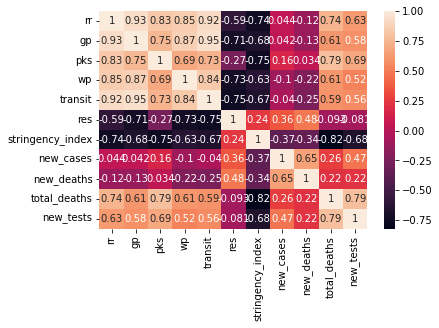

In [ ]:
sns.heatmap(correlation_df, annot=True)
plt.show()